In [62]:
import tweepy
import json
import numpy as np
import pandas as pd
from pprint import pprint
import matplotlib.pyplot as plt
import time
from config import consumer_key, consumer_secret, access_token, access_token_secret


In [63]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


In [64]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [74]:
social_data_sentiments = []
sentiments = []
compound_list = []
positive_list = []
negative_list = []
neutral_list = []
user_account = []
tweets_ago = []
text = []
date = []

target_search = ["@BBC", "@CBS", "@CNN", "@FoxNews", "@nytimes"]


for target in target_search:
    tweet_count = 1
    for x in range(5):
        
        public_tweets = api.user_timeline(target)

        for tweet in public_tweets:
          
            compound = analyzer.polarity_scores(tweet["text"])["compound"]
            pos = analyzer.polarity_scores(tweet["text"])["pos"]
            neu = analyzer.polarity_scores(tweet["text"])["neu"]
            neg = analyzer.polarity_scores(tweet["text"])["neg"]
            tweet_ago = tweet_count
            tweet_text = tweet["text"]


            social_data_sentiments.append({"User" : target,
                           "Date": tweet["created_at"],
                           "Compound" : compound,
                           "Positive" : pos,
                           "Negative" : neg,
                           "Neutral" : neu,
                           "Tweets Ago" : tweet_count,
                           "Tweet Text" : tweet_text})
        
            tweet_count = tweet_count + 1
        
sentiments = pd.DataFrame.from_dict(social_data_sentiments)
sentiments

 

,Compound,Date,Negative,Neutral,Positive,Tweet Text,Tweets Ago,User
0,0.0000,Thu Oct 04 20:06:04 +0000 2018,0.000,1.000,0.000,🎶 @BTS_twt is the #KPop band taking over the w...,1,@BBC
1,-0.5209,Thu Oct 04 19:01:08 +0000 2018,0.218,0.684,0.097,Could the power of fake pills be used to treat...,2,@BBC
2,0.0000,Thu Oct 04 18:01:09 +0000 2018,0.000,1.000,0.000,This is how homophobia feels in 2018. \n#Natio...,3,@BBC
3,-0.6124,Thu Oct 04 17:11:06 +0000 2018,0.250,0.654,0.096,🥓 Regularly eating foods like bacon and sausag...,4,@BBC
4,0.4215,Thu Oct 04 16:03:07 +0000 2018,0.000,0.714,0.286,"Maya Angelou: prolific, powerful, and a polyma...",5,@BBC
5,-0.4588,Thu Oct 04 15:29:47 +0000 2018,0.242,0.670,0.088,RT @BBCWales: Forget the lies and the myths ab...,6,@BBC
6,0.0000,Thu Oct 04 14:01:23 +0000 2018,0.000,1.000,0.000,How did Shakespeare invent all those clichés? ...,7,@BBC
7,0.1531,Thu Oct 04 13:03:03 +0000 2018,0.000,0.890,0.110,🌡🌍 What does 1.5C mean in a warming world?\n👉 ...,8,@BBC
8,-0.2500,Thu Oct 04 12:02:05 +0000 2018,0.357,0.429,0.214,Are you feeling lonely? https://t.co/HxqBp6oh17,9,@BBC
9,0.4404,Thu Oct 04 11:28:10 +0000 2018,0.000,0.813,0.187,"RT @BBCEarth: This #WorldAnimalDay, we’re givi...",10,@BBC


In [76]:
sentiments.reset_index()
sentiments.to_csv("News_Mood.csv", index = False, header = True)
sentiments.head()

,Compound,Date,Negative,Neutral,Positive,Tweet Text,Tweets Ago,User
0,0.0000,Thu Oct 04 20:06:04 +0000 2018,0.000,1.000,0.000,🎶 @BTS_twt is the #KPop band taking over the w...,1,@BBC
1,-0.5209,Thu Oct 04 19:01:08 +0000 2018,0.218,0.684,0.097,Could the power of fake pills be used to treat...,2,@BBC
2,0.0000,Thu Oct 04 18:01:09 +0000 2018,0.000,1.000,0.000,This is how homophobia feels in 2018. \n#Natio...,3,@BBC
3,-0.6124,Thu Oct 04 17:11:06 +0000 2018,0.250,0.654,0.096,🥓 Regularly eating foods like bacon and sausag...,4,@BBC
4,0.4215,Thu Oct 04 16:03:07 +0000 2018,0.000,0.714,0.286,"Maya Angelou: prolific, powerful, and a polyma...",5,@BBC


TypeError: 'AxesSubplot' object is not subscriptable

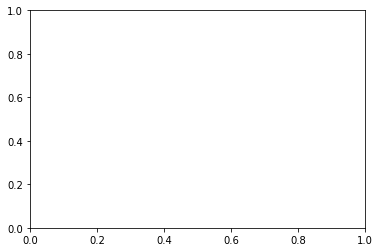

In [93]:
#plt.xlim(101, -1)

data = plt.subplot()

cp = sentiments[sentiments["User"] == "@BBC"]["Compound"]

data.scatter(x, cp, marker="o",color = 'red', alpha = 0.75)

data.scatter(x, ip, marker="o",color = 'blue', alpha =0.75)
data.scatter(x, cn, marker="o",color = 'Orange', alpha = 0.75)

data.scatter(x, bc,marker="o",color = 'green', alpha =0.75)
data.scatter(x, fx, marker="o",color = 'yellow', alpha = 0.75)

#for user in target:
    #dataframe = sentiments.loc[sentiments["User"] == user]
    #plt.scatter(dataframe["Tweets Ago"],dataframe["Compound"],label = user)
    
    
plt.legend(loc=10, bbox_to_anchor=(1.18, .5), ncol=1, title="Media Outlets")

plt.title("Sentiment Analysis of Media Tweets (10/4/2018)")
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")

plt.grid()

plt.savefig("Sentiment Analysis of Media Tweets")
plt.show()

In [82]:
sentiment = sentiments.groupby("User")["Compound"].mean()
sentiment

AttributeError: 'tuple' object has no attribute 'groupby'

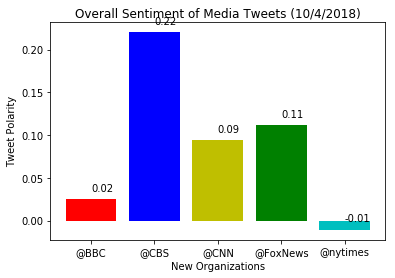

In [85]:
x_axis = np.arange(len(average_sentiment))
xlabels = average_sentiment.index
count = 0
for sentiment in average_sentiment:
    plt.text(count, sentiment+.01, str(round(sentiment,2)))
    count = count + 1
plt.bar(x_axis, average_sentiment, tick_label = xlabels, color = ['r', 'b', 'y', 'g', 'c'])



plt.title("Overall Sentiment of Media Tweets (10/4/2018)")
plt.xlabel("New Organizations")
plt.ylabel("Tweet Polarity")
plt.savefig("Overall Sentiment of Media Tweets")
plt.show()



# Observable 